# **MNIST**

# About Dataset

## Context
MNIST is a subset of a larger set available from NIST (it's copied from http://yann.lecun.com/exdb/mnist/)

## Content
The MNIST database of handwritten digits has a training set of 60,000 examples, and a test set of 10,000 examples. .
Four files are available:

- train-images-idx3-ubyte.gz: training set images (9912422 bytes)
- train-labels-idx1-ubyte.gz: training set labels (28881 bytes)
- t10k-images-idx3-ubyte.gz: test set images (1648877 bytes)
- t10k-labels-idx1-ubyte.gz: test set labels (4542 bytes)

## Acknowledgements
- Yann LeCun, Courant Institute, NYU
- Corinna Cortes, Google Labs, New York
- Christopher J.C. Burges, Microsoft Research, Redmond

## Inspiration
Many methods have been tested with this training set and test set (see http://yann.lecun.com/exdb/mnist/ for more details)


# Download Dataset

In [ ]:
class MNIST_Dataset(object):

# Create name references
  def __init__(self, images_filepath, labels_filepath):
        self.images_filepath = images_filepath
        self.labels_filepath = labels_filepath
        self.data = None
        self.labels = None

  def __len__(self):
    return len(self.labels)

  def __getitem__(self, index):
    return self.data[index], self.labels[index]

  def read_images_labels(self, images_filepath, labels_filepath):
        labels = []

        # Check if file has correct magic number
        with open(labels_filepath, 'rb') as file:
          # Store the magic number and number of labels in file
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
            # An array to store each label as a number from 0 to 255. In this case, 0 to 9
            labels = array("B", file.read())


        with open(images_filepath, 'rb') as file:
          # Store the magic number, the number of images, the number of rows per image, and the number of columns per image
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
            # An array to store each pixel (value between 0 to 255). Next element is a pixel is a row-wise manner.
            image_data = array("B", file.read())

        images = []
        # Initialize array to store pixels of 28x28 images.
        for i in range(size):
            images.append([0] * rows * cols)

        # For each imageimages
        for i in range(size):
            start_index = i * rows * cols
            end_index = (i + 1) * rows * cols

            # Create a 1D matrix/NumPy array of 28x28 = 784
            img = np.array(image_data[start_index: end_index])

            # Convert to a 2D matrix/NumPy array of 28x28
            img = img.reshape(28, 28)

            # Replace empty list with 2D pixel image at index i location.
            images[i][:] = img
        # Return labels as a list
        # Return images as a list of 2D matrices
        # Index match image and label
        return images, labels

  def load_data(self):
    # Read filepaths
    x, Y = self.read_images_labels(self.images_filepath, self.labels_filepath)

    # Return test and train objects
    return x, Y


# Implementation

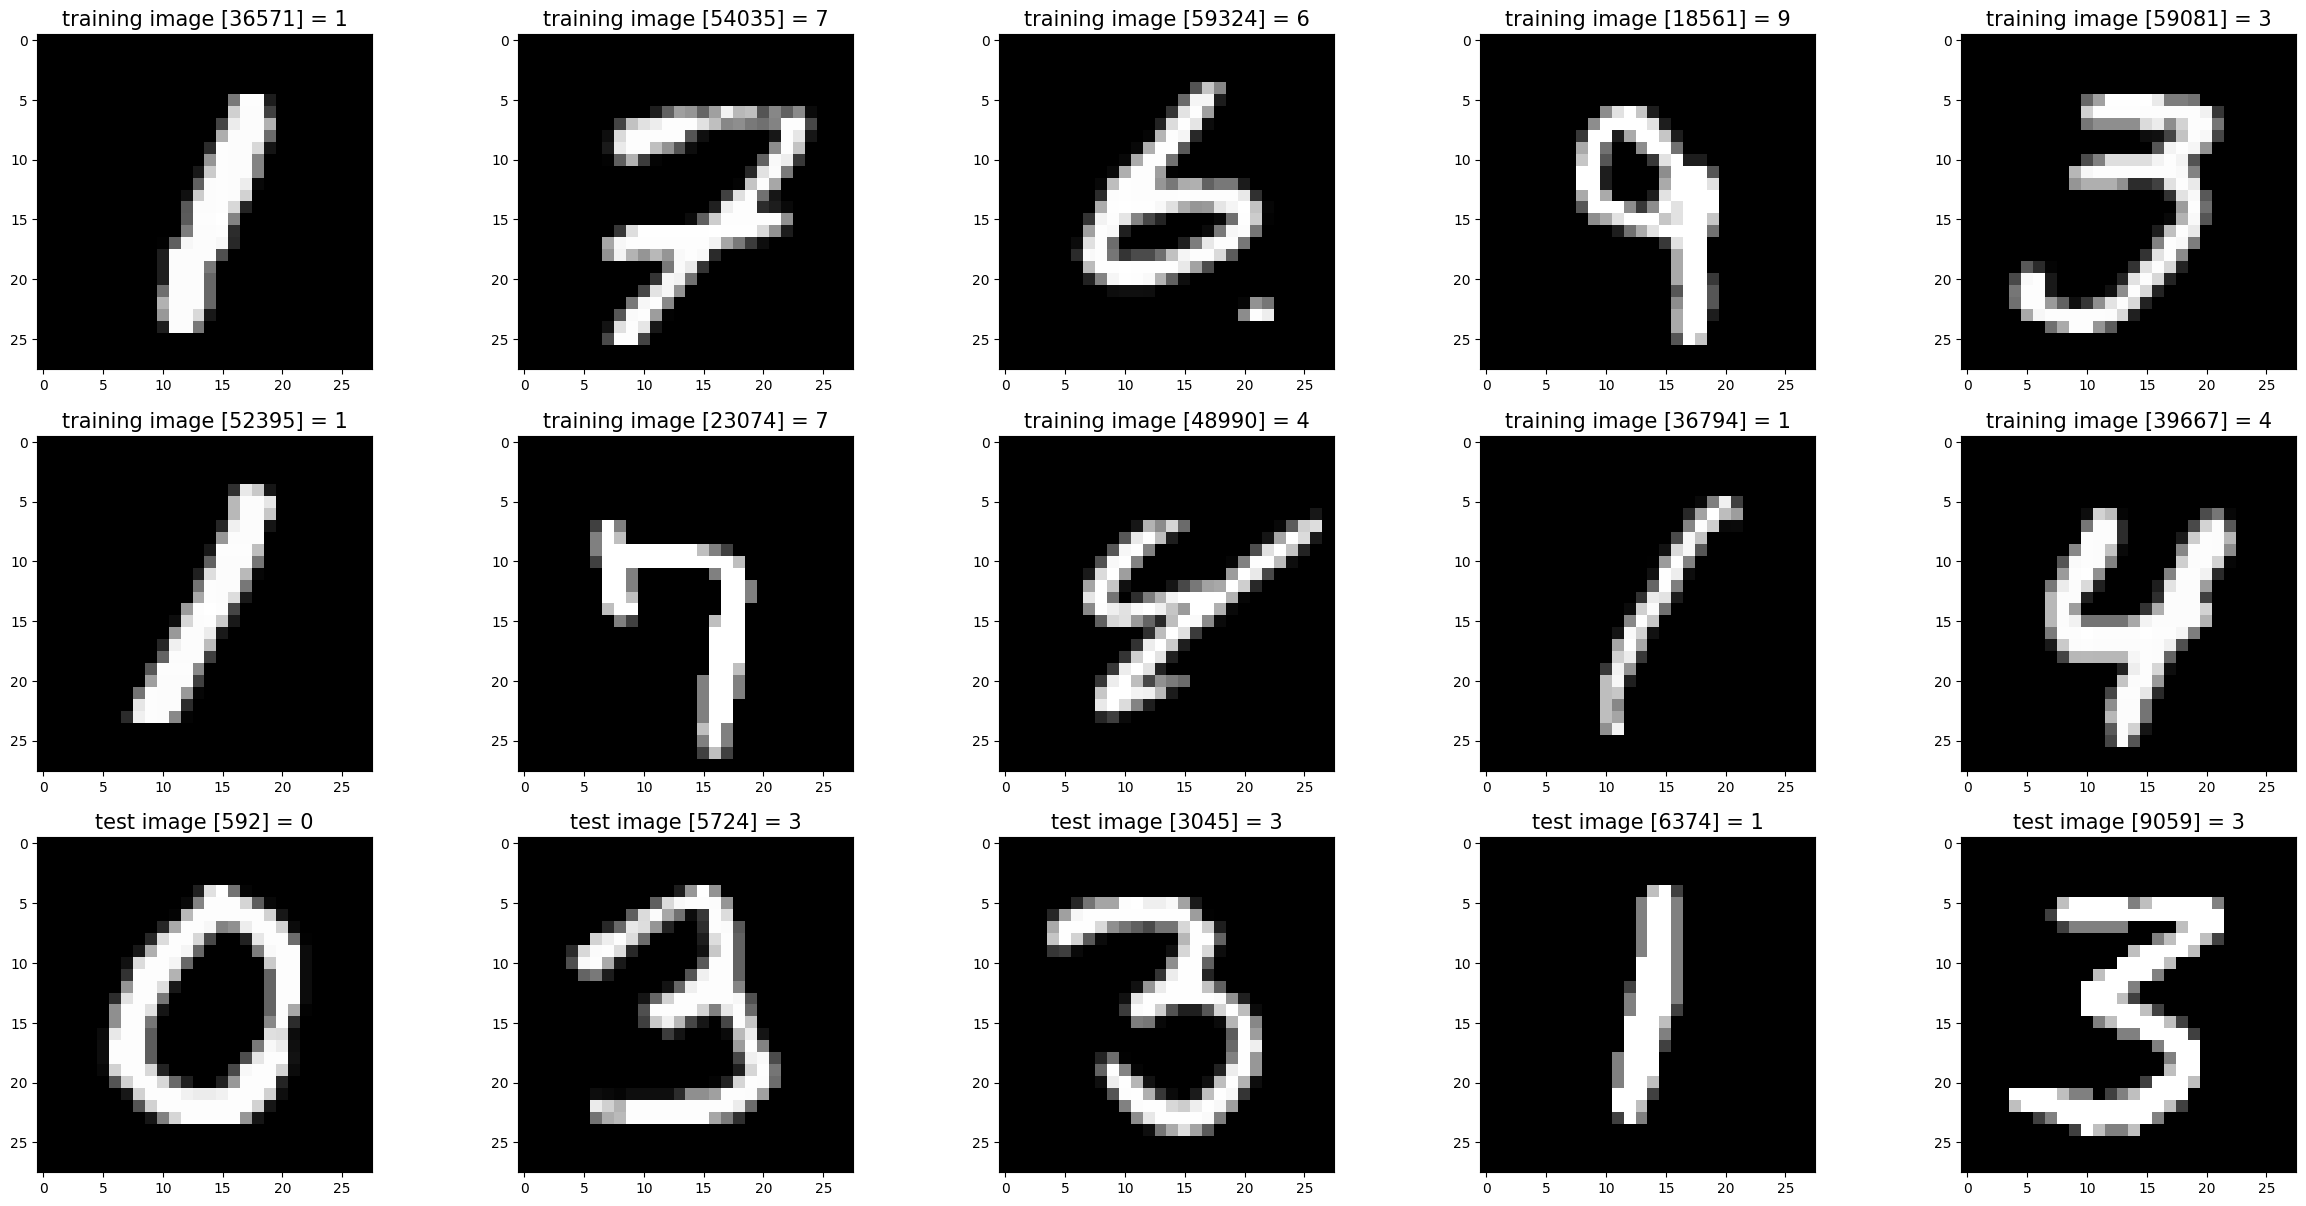

In [ ]:
#
# Verify Reading Dataset via MnistDataloader class
#
# Keep Viz in output cell.
%matplotlib inline
import random
import matplotlib.pyplot as plt

#
# Set file paths based on added MNIST Datasets
#

input_path = '/content/mnist'
training_images_filepath = join(input_path, 'train-images-idx3-ubyte')
training_labels_filepath = join(input_path, 'train-labels-idx1-ubyte')
test_images_filepath = join(input_path, 't10k-images-idx3-ubyte')
test_labels_filepath = join(input_path, 't10k-labels-idx1-ubyte')


#
# Helper function to show a list of images with their relating titles
#
def show_images(images, title_texts):

  # Create a fix grid of 5 columns for display
    cols = 5
  # Calculate numbe rof rows of grid display
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1
    for x in zip(images, title_texts):
        image = x[0]
        title_text = x[1]

        # Create subplot at this location
        plt.subplot(rows, cols, index)
        # Display image
        plt.imshow(image, cmap=plt.cm.gray)
        # Display label
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);
        # Move to next location of grid
        index += 1

#
# Load MINST dataset
#
mnist_train_dataset = MNIST_Dataset(training_images_filepath, training_labels_filepath)
mnist_test_dataset = MNIST_Dataset(test_images_filepath, test_labels_filepath)
mnist_train_dataset.data, mnist_train_dataset.labels = mnist_train_dataset.load_data()
mnist_test_dataset.data, mnist_test_dataset.labels = mnist_test_dataset.load_data()


#
# Show some random training and test images
#
images_2_show = []
titles_2_show = []

# Pick 10 random train images
for i in range(0, 10):
    r = random.randint(1, 60000)
    images_2_show.append(mnist_train_dataset.data[r])
    titles_2_show.append('training image [' + str(r) + '] = ' + str(mnist_train_dataset.labels[r]))

# Pick 5 random test images
for i in range(0, 5):
    r = random.randint(1, 10000)
    images_2_show.append(mnist_test_dataset.data[r])
    titles_2_show.append('test image [' + str(r) + '] = ' + str(mnist_test_dataset.labels[r]))

show_images(images_2_show, titles_2_show)


# Designing MLP Architecture

In [ ]:
import torch
import torch.nn as nn
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using {device} device')

class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 400),
            nn.ReLU(),
            nn.Linear(400, 200),
            nn.ReLU(),
            nn.Linear(200, 100),
            nn.ReLU(),
            nn.Linear(100, 10)
        )

    def forward(self, x):
        return self.layers(x)

model = MLP().to(device)
print(model)

Using cpu device
MLP(
  (layers): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=400, bias=True)
    (2): ReLU()
    (3): Linear(in_features=400, out_features=200, bias=True)
    (4): ReLU()
    (5): Linear(in_features=200, out_features=100, bias=True)
    (6): ReLU()
    (7): Linear(in_features=100, out_features=10, bias=True)
  )
)


In [ ]:
# Cross Entropy Loss Function and Adam Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

# Training

In [ ]:
def evaluate(data_loader, model, criterion, list_loss, list_acc, is_train=True):
    if is_train:
        model.train()
    else:
        model.eval()

    num_batches = len(data_loader)
    num_items = len(data_loader.dataset)

    total_loss = 0
    total_correct = 0

    with torch.set_grad_enabled(is_train):
        for data, target in data_loader:
            data = data.to(device)
            target = target.to(device)
            output = model(data)
            loss = criterion(output, target)
            total_loss += loss.item()
            total_correct += (torch.argmax(output, dim=1) == target).sum().item()

            if is_train:
                loss.backward()
                optimizer.step()
                optimizer.zero_grad()

    avg_loss = total_loss / num_batches
    accuracy = total_correct / num_items

    list_loss.append(avg_loss)
    list_acc.append(accuracy)
    if is_train:

      print(f"Average loss: {avg_loss:.7f}, accuracy: {accuracy:.2%}")

    else:
      print(f"Test Average loss: {avg_loss:.7f}, accuracy: {accuracy:.2%}")

def train(data_loader, model, criterion, optimizer, loss, acc):
    evaluate(data_loader, model, criterion, loss, acc, is_train=True)

def test(data_loader, model, criterion, loss, acc):
    evaluate(data_loader, model, criterion, loss, acc, is_train=False)

In [ ]:
from torch.utils.data import TensorDataset
# Convert to tensors
mnist_train_dataset.data = torch.tensor(np.array(mnist_train_dataset.data), dtype=torch.float32)
mnist_train_dataset.labels = torch.tensor(np.array(mnist_train_dataset.labels), dtype=torch.long)
mnist_test_dataset.data = torch.tensor(np.array(mnist_test_dataset.data), dtype=torch.float32)
mnist_test_dataset.labels = torch.tensor(np.array(mnist_test_dataset.labels), dtype=torch.long)

train_dataloader = DataLoader(mnist_train_dataset, batch_size=64, shuffle=True)
test_dataloader = DataLoader(mnist_test_dataset, batch_size=64, shuffle=False)

In [ ]:
for X, y in train_dataloader:
    print(f"Shape of X_train [N, C, H, W]: {X.shape}")
    print(f"Shape of y_train: {y.shape} {y.dtype}")
    break

Shape of X_train [N, C, H, W]: torch.Size([64, 28, 28])
Shape of y_train: torch.Size([64]) torch.int64


In [ ]:
for X, y in test_dataloader:
    print(f"Shape of X_test [N, C, H, W]: {X.shape}")
    print(f"Shape of y_test: {y.shape} {y.dtype}")
    break

Shape of X_test [N, C, H, W]: torch.Size([64, 28, 28])
Shape of y_test: torch.Size([64]) torch.int64


In [ ]:
%%time

epochs = 50
train_loss = []
train_acc = []
test_loss = []
test_acc = []
for epoch in range(epochs):
    print(f"Training epoch: {epoch+1}")
    train(train_dataloader, model, criterion, optimizer, train_loss, train_acc)
    print(f"Testing epoch: {epoch+1}")
    test(test_dataloader, model, criterion, test_loss, test_acc)

Training epoch: 1
Average loss: 0.0435279, accuracy: 98.88%
Testing epoch: 1
Test Average loss: 0.1368852, accuracy: 96.87%
Training epoch: 2
Average loss: 0.0353583, accuracy: 99.01%
Testing epoch: 2
Test Average loss: 0.1147886, accuracy: 98.07%
Training epoch: 3
Average loss: 0.0432399, accuracy: 98.87%
Testing epoch: 3
Test Average loss: 0.1081567, accuracy: 97.71%
Training epoch: 4
Average loss: 0.0330730, accuracy: 99.13%
Testing epoch: 4
Test Average loss: 0.1113470, accuracy: 97.55%
Training epoch: 5
Average loss: 0.0326943, accuracy: 99.11%
Testing epoch: 5
Test Average loss: 0.1103478, accuracy: 97.95%
Training epoch: 6
Average loss: 0.0262102, accuracy: 99.32%
Testing epoch: 6
Test Average loss: 0.1345259, accuracy: 97.81%
Training epoch: 7
Average loss: 0.0355574, accuracy: 99.14%
Testing epoch: 7
Test Average loss: 0.1599143, accuracy: 97.77%
Training epoch: 8
Average loss: 0.0317983, accuracy: 99.22%
Testing epoch: 8
Test Average loss: 0.1292382, accuracy: 97.81%
Training

# Plotting Results

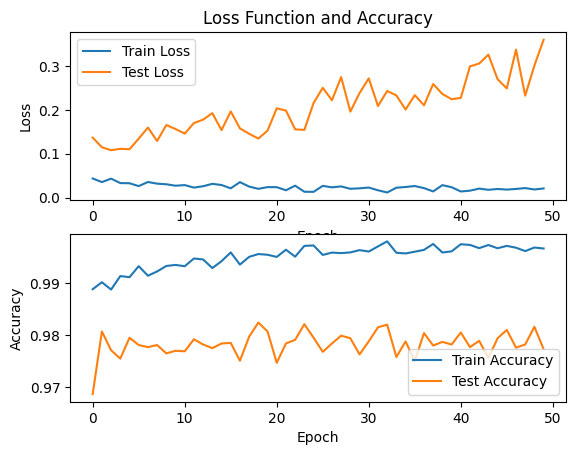

Final Train Accuracy: 99.66%
Final Test Accuracy: 97.73%


In [ ]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(2, 1)

ax1.plot(train_loss, label='Train Loss')
ax1.plot(test_loss, label='Test Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Loss Function and Accuracy')
ax1.legend()

ax2.plot(train_acc, label='Train Accuracy')
ax2.plot(test_acc, label='Test Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.show()

print(f"Final Train Accuracy: {train_acc[-1]:.2%}")
print(f"Final Test Accuracy: {test_acc[-1]:.2%}")